In [1]:
#importing liberaries  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import scipy.stats as stats 
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint

## 1- reading the data  and preparing it for analysis:

In [2]:
csv = pd.read_csv('أثر إدارة المخاطر على أمن المعلومات في صناعة الخدمات اللوجستية بالبريد السعودي.csv')

In [3]:
df = csv 

In [4]:
df.head()

,Timestamp,العمر,الجنس,الجنسية,سنوات الخبرة,هل البريد السعودي مهتم بإدارة المخاطر ؟,هل تم تقديم دورات أو ندوات عن إدارة المخاطر في البريد السعودي؟,هل يتواجد مختصين في إدارة المخاطر من أجل أمن المعلومات لدى البريد السعودي ؟,هل هنالك صعوبة بتطبيق خطة إدارة المخاطر في البريد السعودي؟,هل قدمت إدارة المخاطر سلاسة في الخدمات اللوجستية لدى البريد السعودي ؟,هل تطبيق إدارة المخاطر في البريد السعودي عزز إحترافية العملية اللوجستية ؟,هل ساهمت إدارة المخاطر في رصد ثغرات في الخدمات المقدمة من البريد السعودي؟,هل يواجه أمن المعلومات في الخدمات اللوجستية العديد من المخاطر الداخلية أثناء عملية التوريد لدى البريد السعودي؟,هل يواجه أمن المعلومات في الخدمات اللوجستية العديد من المخاطر الخارجية أثناء عملية التوريد لدى البريد السعودي؟,هل قد تواجه إستمرارية توفير الخدمات اللوجستية على سلسة التوريد مخاطر أمن معلومات إلكترونية ؟,هل المخاطر التي يواجها أمن المعلومات في صناعة الخدمات اللوجستية متكررة لا تستحدث ؟,هل التطورات التقنية أبرزت المخاطر المعلوماتية التي يواجهها أمن المعلومات عند صناعة الخدمات اللوجستية لدى البريد السعودي ؟,هل آمن المعلومات الأكثر عرضه للمخاطر عند صناعة الخدمات اللوجستية في البريد السعودي؟,هل هنالك فرص لمزيد من التطوير في الخدمات اللوجستية التي تقدم حاليا لدى البريد السعودي؟
0,2023/04/07 5:54:04 am EET,20-25,أنثى,سعودي,0-2,ربما,ربما,ربما,ربما,ربما,ربما,ربما,ربما,ربما,ربما,ربما,ربما,ربما,ربما
1,2023/04/07 11:38:47 am EET,20-25,أنثى,سعودي,4-Mar,نعم,نعم,لا,ربما,ربما,نعم,ربما,نعم,نعم,نعم,نعم,لا,نعم,نعم
2,2023/04/07 12:20:02 pm EET,20-25,ذكر,غير سعودي,0-2,ربما,نعم,لا,ربما,لا,نعم,نعم,لا,لا,لا,نعم,نعم,ربما,ربما
3,2023/04/07 12:26:21 pm EET,26-30,أنثى,سعودي,4-Mar,نعم,نعم,نعم,لا,نعم,ربما,نعم,لا,لا,لا,لا,نعم,نعم,نعم
4,2023/04/07 12:29:23 pm EET,20-25,ذكر,سعودي,4-Mar,نعم,لا,نعم,نعم,نعم,نعم,لا,نعم,نعم,نعم,نعم,نعم,نعم,نعم


In [5]:
df.shape

(100, 19)

In [6]:
df.columns

Index(['Timestamp', 'العمر', 'الجنس', 'الجنسية', 'سنوات الخبرة ',
       'هل البريد السعودي مهتم بإدارة المخاطر ؟',
       'هل تم تقديم دورات أو ندوات عن إدارة المخاطر في البريد السعودي؟',
       'هل يتواجد مختصين في إدارة المخاطر من أجل أمن المعلومات لدى البريد السعودي ؟',
       'هل هنالك صعوبة بتطبيق خطة إدارة المخاطر في البريد السعودي؟',
       'هل قدمت إدارة المخاطر سلاسة في الخدمات اللوجستية لدى البريد السعودي ؟',
       'هل تطبيق إدارة المخاطر في البريد السعودي عزز إحترافية العملية اللوجستية ؟',
       'هل ساهمت إدارة المخاطر في رصد ثغرات في الخدمات المقدمة من البريد السعودي؟',
       'هل  يواجه أمن المعلومات في الخدمات اللوجستية العديد من المخاطر الداخلية أثناء عملية التوريد لدى البريد السعودي؟',
       'هل  يواجه أمن المعلومات في الخدمات اللوجستية العديد من المخاطر الخارجية أثناء عملية التوريد لدى البريد السعودي؟',
       ' هل قد تواجه إستمرارية توفير الخدمات اللوجستية على سلسة التوريد مخاطر أمن معلومات إلكترونية  ؟',
       'هل المخاطر التي يواجها أمن المعلومات في صناعة الخدم

#### 1.1 columns names are too long so i will set an index for it and i will transfer it into numbers:

In [7]:
#data dictionary
df_index = pd.DataFrame(df.columns ,index=[i for i in range(len(csv.columns))],columns=['column_name'])
df_index

,column_name
0,Timestamp
1,العمر
2,الجنس
3,الجنسية
4,سنوات الخبرة
5,هل البريد السعودي مهتم بإدارة المخاطر ؟
6,هل تم تقديم دورات أو ندوات عن إدارة المخاطر في...
7,هل يتواجد مختصين في إدارة المخاطر من أجل أمن ا...
8,هل هنالك صعوبة بتطبيق خطة إدارة المخاطر في الب...
9,هل قدمت إدارة المخاطر سلاسة في الخدمات اللوجست...


In [8]:
df.columns = [ i for i in range(len(csv.columns))]

.-----------------------------------------------------------------------------------.

#### 1.2 there are arabic values i will convert it into english:

In [9]:
df[2].replace({'أنثى':'F','ذكر':'M'},inplace=True)

In [10]:
df[3].replace({'سعودي':'Saudi', 'غير سعودي':'Not Saudi'}, inplace=True)

In [11]:
#defining function that takes the yes no question and convert its values to english words 
def yes_no(df):
    for i in df.columns[5:]:
        df[i] = df[i].replace({'نعم':'Yes','لا':'No','ربما':'Maybe'})
    return df 
    

In [12]:
df = yes_no(df)

In [13]:
#final shape of the data 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2023/04/07 5:54:04 am EET,20-25,F,Saudi,0-2,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe
1,2023/04/07 11:38:47 am EET,20-25,F,Saudi,4-Mar,Yes,Yes,No,Maybe,Maybe,Yes,Maybe,Yes,Yes,Yes,Yes,No,Yes,Yes
2,2023/04/07 12:20:02 pm EET,20-25,M,Not Saudi,0-2,Maybe,Yes,No,Maybe,No,Yes,Yes,No,No,No,Yes,Yes,Maybe,Maybe
3,2023/04/07 12:26:21 pm EET,26-30,F,Saudi,4-Mar,Yes,Yes,Yes,No,Yes,Maybe,Yes,No,No,No,No,Yes,Yes,Yes
4,2023/04/07 12:29:23 pm EET,20-25,M,Saudi,4-Mar,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes


##### here we have 5  columns of information about the person and the time he did the surrvey at, and 14 question of the survay data
#### the data contains that :

0 column : the date and the time that the person answered the questions. (date and time )

1 column : the age bin that the specific person lies in. (ordinal)

2 column : the gender column. (nominal)

3 column : the nationality of the person if he is saudi or not. (nominal)

4 column : years of experience of the person. (ordinal)

columns from 5 >> 18 : the questions that is the survey about  and  the answers is (Yes,No,Maybe). (nominal)


.--------------------------------------------------------------------.

## 2- exploring the data (EDA):

####  defining fucntions to help in analysis and summarize the categories:  

In [14]:
#get probotion function
def get_summary(col):
    prob = df[col].value_counts()/df[col].count()
    return(prob)

In [15]:
#draw barplot fuchion
def draw_plt(col):
    fig, ax = plt.subplots()
    ax.bar(df[col].value_counts().index, df[col].value_counts().values)

In [16]:
#draw a stacked plot for filtering
def stacked_filter_plot(df1, label1, df2, label2, col):
    fig, ax = plt.subplots()
    ax.bar(df1[col].value_counts().index, df1[col].value_counts().values,color='r', label= label1)
    ax.bar(df1[col].value_counts().index,  df2[col].value_counts().values, bottom=df1[col].value_counts().values, color='b', label=label2)
    ax.legend()

In [17]:
#having a general sight on every column in tha data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       100 non-null    object
 1   1       100 non-null    object
 2   2       100 non-null    object
 3   3       100 non-null    object
 4   4       100 non-null    object
 5   5       100 non-null    object
 6   6       100 non-null    object
 7   7       100 non-null    object
 8   8       100 non-null    object
 9   9       100 non-null    object
 10  10      100 non-null    object
 11  11      100 non-null    object
 12  12      100 non-null    object
 13  13      100 non-null    object
 14  14      100 non-null    object
 15  15      100 non-null    object
 16  16      100 non-null    object
 17  17      100 non-null    object
 18  18      100 non-null    object
dtypes: object(19)
memory usage: 15.0+ KB


#### 2.1 checking the date column :

In [18]:
#unique days that we have 
df[0].str.split().str[0].unique()

array(['2023/04/07', '2023/04/08', '2023/04/09', '2023/04/13',
       '2023/04/14', '2023/04/15', '2023/04/16'], dtype=object)

the survey has been done  (between 7 april and 16 april) 

.-------------------------------------------------------------------------------------------.

#### 2.2 checking age range column:

In [19]:
#count of every value 
df[1].value_counts()

31-36 +    60
20-25      21
26-30      19
Name: 1, dtype: int64

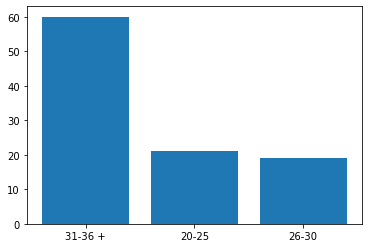

In [20]:
#barplot of hte count of each value
draw_plt(1)

In [21]:
#the propotion of every value 
get_summary(1)

31-36 +    0.60
20-25      0.21
26-30      0.19
Name: 1, dtype: float64

In [297]:
#making test to see if the 31-36+ category if the hieghest propotion in the population
stat, p_value = proportions_ztest(count=60, nobs=100, value=.5)
stat, p_value

(2.0412414523193148, 0.0412268333371637)

- p_val less than significance level so there is enough evidence to conclude that the (31-36) is the bigest category in the population

In [271]:
lower, upper = proportion_confint(count=60, nobs=100, alpha=0.05)
lower, upper

(0.5039817664728937, 0.6960182335271062)

- with 95% confidince we are sure that propotion of  people in (31-36) is between 50% and 69% of the population

  *how are males and females distributed over age ?* 

In [244]:
#female and male filters to use them
F_filter = df[2] == 'F'
M_filter = df[2] == 'M'

In [245]:
df[F_filter][1].value_counts()

31-36 +    29
20-25      12
26-30      10
Name: 1, dtype: int64

In [246]:
df[M_filter][1].value_counts()

31-36 +    31
20-25       9
26-30       9
Name: 1, dtype: int64

* the biggest bin of age ranges is 31-39+
* appears from the sample that the age range bins doesn't affected by males and females 



**performing a chi2 test :**

In [28]:
#making contengy to perform chisquare
con_t = pd.crosstab(df[2],df[1])

In [298]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(con_t)
chi2_stat, p_value

(0.5080729033468023, 0.775663527297582)

- p_value is .77 so we fail to reject the Null hypothesis and we conclude that there is no relation between Gender and age 

-- **is there a relation between age and  the years of experience ?**

**performing chisquare:**

In [31]:
#contengency table between age and year of experience 
con_tab = pd.crosstab(df[1],df[4])
con_tab

4,0-2,4-Mar,5-6+
1,,,
20-25,11,7,3
26-30,5,9,5
31-36 +,10,1,49


In [32]:
xticks = con_tab.index
x = [1,2,3]
y = np.array(con_tab)

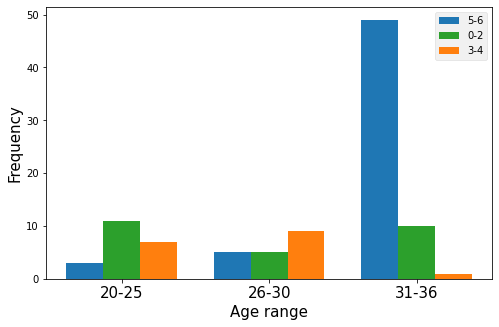

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
plt.style.use('bmh')
ax.bar(x, y[:,2], width=.25, color='tab:blue', label = '5-6')
ax.bar(np.array(x)+.25, y[:,0], width=.25, color='tab:green',label = '0-2')
ax.bar(np.array(x)+.50, y[:,1], width=.25, color='tab:orange', label = '3-4')
ax.legend()
ax.set_xlabel('Age range',size=15)
ax.set_ylabel('Frequency',size=15,fontsize=15)
ax.set_xticks(np.array(x)+.25)
ax.set_xticklabels(['20-25','26-30' ,'31-36'],fontsize=15);

In [34]:
chi2_stat, p_value, dof, expected_values = stats.chi2_contingency(con_tab)
chi2_stat, p_value

(45.79804675616961, 2.7130678813184594e-09)

P_value is very less than .05 (the level of significane) so we reject the null hypothesis..
we can conclude that there is a significant relationship between years of experience and age. 

**is there a relation between nationality and age ?**

In [35]:
pd.crosstab(df[3],df[1])

1,20-25,26-30,31-36 +
3,,,
Not Saudi,2,4,3
Saudi,19,15,57


In [36]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[3],df[1]))
chi2_stat, p_value

(4.549224098096278, 0.10283679633053538)

P_val is bigger that > level of significance so we don't have enough evidence to reject the Null hypothesis

.-------------------------------------------------------------------------------------------.

#### 2.3 checking gender column:

In [37]:
df[2].value_counts()

F    51
M    49
Name: 2, dtype: int64

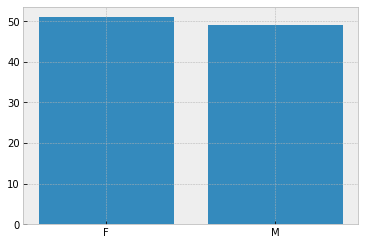

In [38]:
#barplot of each value
draw_plt(2)    

In [39]:
get_summary(2)

F    0.51
M    0.49
Name: 2, dtype: float64

In [40]:
#creating sampling distribution to make confidince  interval of the probotion of males 
sampling_dist = []

for i in range(10000):
    sample = df[2].sample(100,replace=True)
    prob = sample.replace({'M':1,'F':0}).mean()
    sampling_dist.append(prob)
    


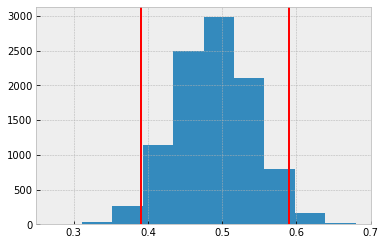

In [41]:
plt.hist(sampling_dist)
plt.axvline(np.percentile(sampling_dist, 2.5),color='r', linewidth=2);
plt.axvline(np.percentile(sampling_dist, 97.5),color='r', linewidth=2);



In [42]:
#intervals 
np.percentile(sampling_dist, 2.5), np.percentile(sampling_dist, 97.5)

(0.39, 0.59)

* We are 95% confident that the probotion of males is between 40% and 59% .
* The female probotion is between 60% and 39%.


.-------------------------------------------------------------------------------------------.

#### 2.4 checking Nationality column:

In [43]:
#values count
df[3].value_counts()

Saudi        91
Not Saudi     9
Name: 3, dtype: int64

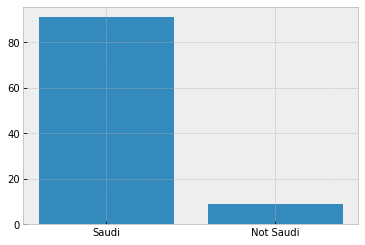

In [44]:
#barplot of each value
draw_plt(3)    

In [45]:
#the propotion of each value
get_summary(3)

Saudi        0.91
Not Saudi    0.09
Name: 3, dtype: float64

* more than .90% of the survey are saudis (there are only 9 people of 100 who are Not saudis)

In [46]:
df[3].sample(100,replace=True).replace({'Saudi':0,'Not Saudi':1}).mean()

0.08

In [47]:
sampl_dist = []
for i in range(10000):
    prob = df[3].sample(100,replace=True).replace({'Saudi':0,'Not Saudi':1}).mean()
    sampl_dist.append(prob)

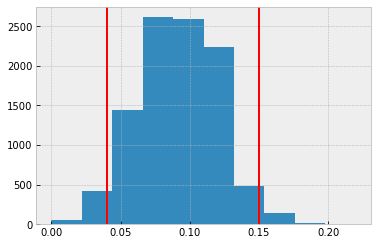

In [48]:
plt.hist(sampl_dist)
plt.axvline(np.percentile(sampl_dist,2.5),color='r')
plt.axvline(np.percentile(sampl_dist,97.5),color='r');

In [49]:
np.percentile(sampl_dist,2.5), np.percentile(sampl_dist,97.5)

(0.04, 0.15)

* We are 95% confident that the probotion of Not Saudies is between 4% and 15%.
* the probotion of saudies is between %96 and  %85



is there a relation between nationality and gender? 

In [50]:
con_table = pd.crosstab(df[2], df[3])
con_table

3,Not Saudi,Saudi
2,,
F,3,48
M,6,43


H0: p1 - p2 = 0 

H1: p1 - p2 != 0

In [51]:
n1, n2, x1, x2 = 9, 90, 3, 47

In [52]:
prop_diff, p_value = proportions_ztest([x1, x2], [n1, n2])
prop_diff, p_value

(-1.0806460652625112, 0.27985458316245515)

* P_value is .27 so we fail to reject the Null hypothesis that there is a difference in Saudi and Not saudi probotions between males and females

*  #### //Note: the assumption of the central limit theorm for two probotion are not verified !!


* so will try the bootstrap method and see how the distribution will look like:

In [53]:
prob_list = []
for i in range(2000):
    samdist = df.sample(100,replace=True)
    contable = pd.crosstab(samdist[2],samdist[3])
    p1 = contable['Not Saudi']['M'] /(contable['Not Saudi']['F'] + contable['Not Saudi']['M'])
    p2 = contable['Saudi']['M'] /(contable['Saudi']['F'] + contable['Saudi']['M'])
    prob_list.append(p2-p1)
    
    

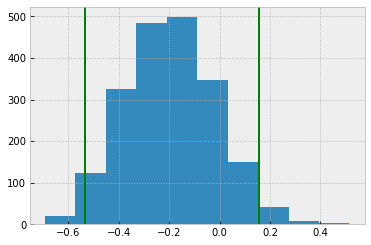

In [54]:
plt.hist(prob_list)
# plt.axvline(np.mean(a),color='r')
plt.axvline(np.percentile(prob_list,2.5),color='green')
plt.axvline(np.percentile(prob_list,97.5),color='green')

In [55]:
np.percentile(prob_list,2.5), np.percentile(prob_list,97.5)

(-0.5319322386679001, 0.15530934343434344)

* we see here that  'Zero value' is within the interval 
* the CLT and Bootstrap led to the same results that  there is no evidence to reject the null which means that with  there is no enough evidence to conclude that there is a difference between the propotions of males in the two categories (saudi, not saudi) ,and so there is no difference in the propotions of females too. 
* there isnt enough evidence to conclude that there is a relation between the nationality and the gender 

.-------------------------------------------------------------------------------------------.

#### 2.5 checking Years of experience column:

In [257]:
#value_counts
df[4].value_counts()

5-6+     57
0-2      26
4-Mar    17
Name: 4, dtype: int64

In [258]:
#value_counts
df[4].value_counts()

5-6+     57
0-2      26
4-Mar    17
Name: 4, dtype: int64

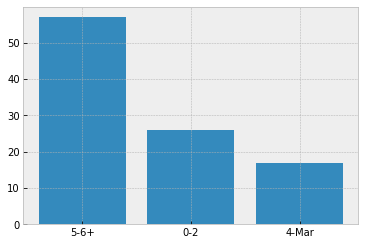

In [259]:
#plotting the values 
draw_plt(4)

In [260]:
#getting the propotion of each value
get_summary(4)

5-6+     0.57
0-2      0.26
4-Mar    0.17
Name: 4, dtype: float64

the most frequent value in the survay is in range (5-6+) and its propotion is approxemately .57

conductiong confidince intervals to try to conclude the propotions in the population:

In [261]:
lower, upper = proportion_confint(count=57, nobs=100, alpha=0.05)
lower, upper

(0.47296693568931614, 0.6670330643106838)

In [262]:
lower, upper = proportion_confint(count=26, nobs=100, alpha=0.05)
lower, upper

(0.17402926793951617, 0.34597073206048384)

In [263]:
lower, upper = proportion_confint(count=17, nobs=99, alpha=0.05)
lower, upper

(0.09742779990216006, 0.24600654353218337)

**are there a relationship between Gender and years of experience ?**

**performing Chi2 Test:**

In [64]:
df[F_filter][4].value_counts() / df[F_filter][4].count()

0-2      0.411765
5-6+     0.411765
4-Mar    0.176471
Name: 4, dtype: float64

In [65]:
df[M_filter][4].value_counts() / df[M_filter][4].count()

5-6+     0.734694
4-Mar    0.163265
0-2      0.102041
Name: 4, dtype: float64

In [66]:
con_tab = pd.crosstab(df[2],df[4])
con_tab

4,0-2,4-Mar,5-6+
2,,,
F,21,9,21
M,5,8,36


In [67]:
pd.crosstab(df[3],df[4])

4,0-2,4-Mar,5-6+
3,,,
Not Saudi,2,4,3
Saudi,24,13,54


In [68]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[3],df[4]))
chi2_stat, p_value

(5.4080263892123845, 0.06693634441221893)

In [69]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(con_tab)
chi2_stat, p_value

(13.817872945796562, 0.0009988195034187999)

- P_value is less than .05 there are a relation between Gender and Years of Experience 

 - now will conduct two probotion z test for each years of experience bin:

In [70]:
# 3 categories so we will do b_correction and diveded it by the number of the tests 
b_correcion = .05/3
nF = 50
nM = 49 

In [71]:
#first test (5-9+ )
xF = 21
xM = 36

prop_diff, p_value = proportions_ztest([xF, xM], [nF, nM])
prop_diff, p_value

(-3.1675746607209394, 0.0015371623432465318)

- since p_value < b_correcion  so there is a difference in probotion between males and females (5-9+) 
- males are higher 

In [72]:
#second test (3-4)
xF = 9
xM = 8

prop_diff, p_value = proportions_ztest([xF, xM], [nF, nM])
prop_diff, p_value


(0.22074304291732186, 0.8252925146431312)

- p_Values > b_correction so there is no difference in propotions between males and female in that category (3-4)

In [73]:
#third test
xF = 20
xM = 5

prop_diff, p_value = proportions_ztest([xF, xM], [nF, nM])
prop_diff, p_value


(3.4117056211592365, 0.000645577906789499)

- p value is less that b_correction so there is a difference in probotions between males and females in (0-2)
- females are higher

- probotion of males with (5-6+) experience years is higher than females 
- probotion of females with (0-2) experience years is higher than males 
- no difference in  probotion of (3-5) between males and females 

--- the propotion of males in in the heighest years of experience category  is bigger than females 

.--------------------------------------------------------------------------------------------------------.

In [74]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2023/04/07 5:54:04 am EET,20-25,F,Saudi,0-2,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe,Maybe
1,2023/04/07 11:38:47 am EET,20-25,F,Saudi,4-Mar,Yes,Yes,No,Maybe,Maybe,Yes,Maybe,Yes,Yes,Yes,Yes,No,Yes,Yes
2,2023/04/07 12:20:02 pm EET,20-25,M,Not Saudi,0-2,Maybe,Yes,No,Maybe,No,Yes,Yes,No,No,No,Yes,Yes,Maybe,Maybe
3,2023/04/07 12:26:21 pm EET,26-30,F,Saudi,4-Mar,Yes,Yes,Yes,No,Yes,Maybe,Yes,No,No,No,No,Yes,Yes,Yes
4,2023/04/07 12:29:23 pm EET,20-25,M,Saudi,4-Mar,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes


#### 2.6 the survey questions:

  
#### question1)  Is Saudi Post interested in risk management?

In [75]:
df_index['column_name'][5]

'هل البريد السعودي مهتم بإدارة المخاطر ؟'

In [76]:
#values count
df[5].value_counts()

Maybe    46
Yes      41
No       13
Name: 5, dtype: int64

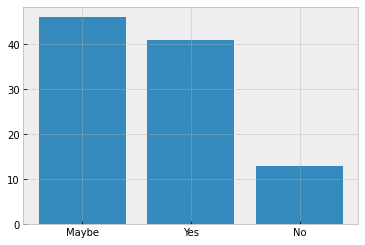

In [77]:
draw_plt(5)

**chi2 test :**

In [78]:
pd.crosstab(df[2],df[5])

5,Maybe,No,Yes
2,,,
F,25,7,19
M,21,6,22


In [79]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[5]))
chi2_stat, p_value

(0.6045031602656559, 0.7391520855163008)

P_value > 0.05 level of significance so there are no relationship between gender the answer of tha question

**z_test of probotion of 'No':**

h0 = Prob(NO) >= .2

h1 = prob(No) < .2


In [80]:
prop_diff, p_value = proportions_ztest(count=13,nobs=99,value=.2)
prop_diff, p_value


(-2.0235111799858503, 0.04302047210280135)

p_value is less than .05 (level of significance) so we reject the null hypothesis

- we have enough evidence to reject the null hypothesis H0 >= .20 
- we have enough evidence to conclude that the population parameter of propotion who answered No is less than .20

In [81]:
#yes intervals
lower, upper = proportion_confint(count=41, nobs=99, alpha=0.05)
lower, upper

(0.3171124881404219, 0.5111703401424064)

In [82]:
#maybe intervals 
lower, upper = proportion_confint(count=45, nobs=99, alpha=0.05)
lower, upper

(0.3564613941849417, 0.5526295149059673)

In [83]:
#no intervals 
lower, upper = proportion_confint(count=13, nobs=99, alpha=0.05)
lower, upper

(0.06478333391510754, 0.1978429287111551)

.--------------------------------------------------------------------------------------------------------.

#### question2)  Are courses or seminars on risk management offered at Saudi Post?

In [84]:
#values counts
df[6].value_counts()

Maybe    47
Yes      27
No       26
Name: 6, dtype: int64

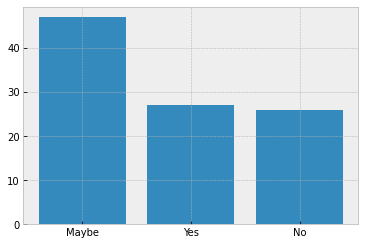

In [85]:
draw_plt(6)

In [86]:
get_summary(6)

Maybe    0.47
Yes      0.27
No       0.26
Name: 6, dtype: float64

In [87]:
pd.crosstab(df[2],df[6])

6,Maybe,No,Yes
2,,,
F,26,14,11
M,21,12,16


In [88]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[6]))
chi2_stat, p_value

(1.5723158997490008, 0.45559184370977723)

P_value is smaller than .05, 


so we will conduct two sample propotion z test to make desicion

- difference in probotions between males and females 

In [89]:
# 3 categories so we will do b_correction and diveded it by the number of the tests 
b_correcion = .05/3
nF = 50
nM = 49 

In [90]:
#test one Yes 
prop_diff, p_value = proportions_ztest([11, 16 ], [nF, nM])
prop_diff, p_value

(-1.18994511964002, 0.23406796298201438)

In [91]:
p_value > b_correcion

True

In [92]:
#test two  (No)
prop_diff, p_value = proportions_ztest([14, 12 ], [nF, nM])
prop_diff, p_value

(0.396812096052203, 0.6915060301555255)

In [93]:
p_value > b_correcion

True

In [94]:
#test three (May be) 
prop_diff, p_value = proportions_ztest([25, 21 ], [nF, nM])
prop_diff, p_value

(0.7124522349172305, 0.47618477943935933)

In [95]:
p_value > b_correcion

True

- there is no enough evidence to conclude that there is a difference in propotion of the answer to this question between males and females 

In [96]:
#yes intervals
lower, upper = proportion_confint(count=27, nobs=100, alpha=0.05)
lower, upper

(0.1829855452491477, 0.35701445475085236)

In [97]:
#No intervals

lower, upper = proportion_confint(count=26, nobs=100, alpha=0.05)
lower, upper

(0.17402926793951617, 0.34597073206048384)

In [98]:
#Maybe intervals

lower, upper = proportion_confint(count=47, nobs=100, alpha=0.05)
lower, upper

(0.37217835657509596, 0.567821643424904)

.--------------------------------------------------------------------------------------------------------.

#### question3)  Are there specialists in risk management for information security at Saudi Post?

In [99]:
#values counts
df[7].value_counts()

Yes      48
Maybe    39
No       13
Name: 7, dtype: int64

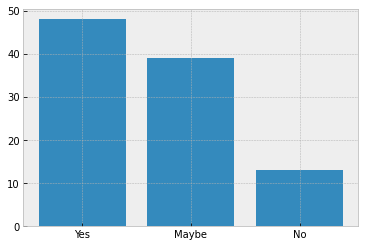

In [100]:
draw_plt(7)

In [101]:
get_summary(7)

Yes      0.48
Maybe    0.39
No       0.13
Name: 7, dtype: float64

In [102]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[7]))
chi2_stat, p_value

(1.6273175937041482, 0.443233394914188)

p_value > 0.05 level of significance so we fail to reject the null hypothesis 

In [103]:
df[7].value_counts()

Yes      48
Maybe    39
No       13
Name: 7, dtype: int64

In [104]:
pd.crosstab(df[2], df[7])

7,Maybe,No,Yes
2,,,
F,23,6,22
M,16,7,26


In [105]:
# 3 categories so we will do b_correction and diveded it by the number of the tests 
b_correcion = .05/3
nF = 50
nM = 49 

In [106]:
#test one Yes 
prop_diff, p_value = proportions_ztest([22, 26 ], [nF, nM])
prop_diff, p_value

(-0.9019486706913122, 0.3670841351310027)

In [107]:
b_correcion > p_value

False

In [108]:
#test one No 
prop_diff, p_value = proportions_ztest([6, 7], [nF, nM])
prop_diff, p_value

(-0.33666787698230277, 0.7363672815462556)

In [109]:
b_correcion > p_value

False

In [110]:
#test one Maybe 
prop_diff, p_value = proportions_ztest([22, 16], [nF, nM])
prop_diff, p_value

(1.1607070845238319, 0.24576103980204977)

- we don't have enough evidence to reject the null hypothesis 
- there is no difference between answers of males and females to this question 

In [111]:
#yes intervals
lower, upper = proportion_confint(count=48, nobs=99, alpha=0.05)
lower, upper

(0.3864018204404037, 0.583295149256566)

In [112]:
#no intervals
lower, upper = proportion_confint(count=13, nobs=99, alpha=0.05)
lower, upper

(0.06478333391510754, 0.1978429287111551)

In [113]:
#maybe intervals
lower, upper = proportion_confint(count=38, nobs=99, alpha=0.05)
lower, upper

(0.28804136043300554, 0.4796354072437621)

.--------------------------------------------------------------------------------------------------------.

#### question4)  Is there any difficulty in applying the risk management plan in Saudi Post?


In [114]:
#values counts
df[8].value_counts()

Maybe    40
No       40
Yes      20
Name: 8, dtype: int64

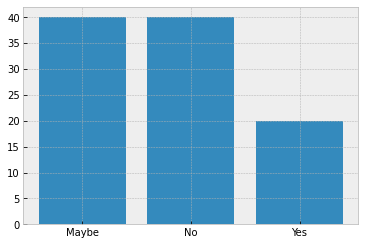

In [115]:
draw_plt(8)

In [116]:
get_summary(8)

Maybe    0.4
No       0.4
Yes      0.2
Name: 8, dtype: float64

In [117]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[8]))
chi2_stat, p_value

(6.862745098039215, 0.03234251860187863)

In [118]:
pd.crosstab(df[2],df[8])

8,Maybe,No,Yes
2,,,
F,26,19,6
M,14,21,14


In [119]:
#test one Yes 
prop_diff, p_value = proportions_ztest([6, 14 ], [nF, nM])
prop_diff, p_value

(-2.05320373310109, 0.04005282252296393)

In [120]:
#test two No 
prop_diff, p_value = proportions_ztest([19, 12 ], [nF, nM])
prop_diff, p_value

(1.4491963970114963, 0.1472827434453312)

In [121]:
#test two maybe
prop_diff, p_value = proportions_ztest([25, 14 ], [nF, nM])
prop_diff, p_value

(2.181654277060274, 0.029135057809874708)

- no enough evidence to reject the null 

In [122]:
df[8].value_counts()

Maybe    40
No       40
Yes      20
Name: 8, dtype: int64

In [123]:
#yes intervals
lower, upper = proportion_confint(count=20, nobs=100, alpha=0.05)
lower, upper

(0.12160144061839782, 0.2783985593816022)

In [124]:
#maybervals
lower, upper = proportion_confint(count=40, nobs=100, alpha=0.05)
lower, upper

(0.3039817664728938, 0.4960182335271062)

In [125]:
#no intervals
lower, upper = proportion_confint(count=40, nobs=100, alpha=0.05)
lower, upper

(0.3039817664728938, 0.4960182335271062)

.--------------------------------------------------------------------------------------------------------.

#### question5)  Did risk management provide smoothness in logistics services at Saudi Post?


In [126]:
#values counts
df[9].value_counts()

Maybe    44
Yes      34
No       22
Name: 9, dtype: int64

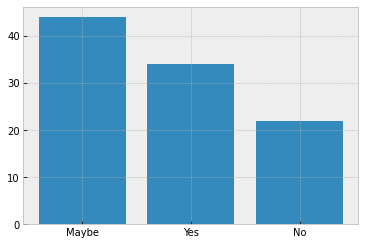

In [127]:
draw_plt(9)

In [128]:
get_summary(9)

Maybe    0.44
Yes      0.34
No       0.22
Name: 9, dtype: float64

In [129]:
pd.crosstab(df[2],df[9])

9,Maybe,No,Yes
2,,,
F,26,9,16
M,18,13,18


In [130]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[9]))
chi2_stat, p_value

(2.26036938839707, 0.32297359956316535)

In [131]:
b_cor = .05 / 3 


In [132]:
#test one Yes 
prop_diff, p_value = proportions_ztest([16, 18 ], [nF, nM])
prop_diff, p_value

(-0.4960168243105033, 0.6198825408603442)

In [133]:
#test no Yes 
prop_diff, p_value = proportions_ztest([9, 13 ], [nF, nM])
prop_diff, p_value

(-1.0207611634313287, 0.3073676085383208)

In [134]:
#test three maybe 
prop_diff, p_value = proportions_ztest([25, 18 ], [nF, nM])
prop_diff, p_value

(1.3313421282672429, 0.18307646221446106)

- there is no enough evidence to reject the null 

In [135]:
df[9].value_counts()

Maybe    44
Yes      34
No       22
Name: 9, dtype: int64

In [136]:
#yes intervals
lower, upper = proportion_confint(count=34, nobs=100, alpha=0.05)
lower, upper

(0.2471547869104841, 0.43284521308951596)

In [137]:
#No intervals
lower, upper = proportion_confint(count=22, nobs=100, alpha=0.05)
lower, upper

(0.13880921643246003, 0.30119078356754)

In [138]:
#Maybe intervals
lower, upper = proportion_confint(count=44, nobs=100, alpha=0.05)
lower, upper

(0.34270994637584823, 0.5372900536241518)

.--------------------------------------------------------------------------------------------------------.

#### question6)  Does the application of risk management in Saudi Post enhance the professionalism of the logistics process?


In [139]:
#values counts
df[10].value_counts()

Maybe    46
Yes      41
No       13
Name: 10, dtype: int64

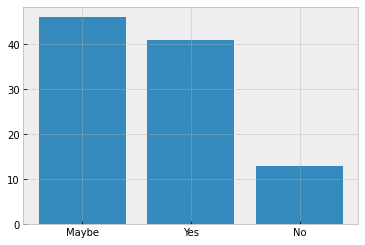

In [140]:
draw_plt(10)

In [141]:
get_summary(10)

Maybe    0.46
Yes      0.41
No       0.13
Name: 10, dtype: float64

In [142]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[10]))
chi2_stat, p_value

(2.264029847194608, 0.32238302439509203)

In [143]:
pd.crosstab(df[2],df[10])

10,Maybe,No,Yes
2,,,
F,27,5,19
M,19,8,22


In [144]:
#test one Yes 
prop_diff, p_value = proportions_ztest([19, 22 ], [nF, nM])
prop_diff, p_value

(-0.6966511118669347, 0.4860211607914212)

In [145]:
#test one Yes 
prop_diff, p_value = proportions_ztest([5, 8 ], [nF, nM])
prop_diff, p_value

(-0.9318485880760166, 0.35141478032015383)

In [146]:
#test one Yes 
prop_diff, p_value = proportions_ztest([26, 19 ], [nF, nM])
prop_diff, p_value

(1.3212239223769853, 0.18642671204082062)

In [147]:
df[10].value_counts()

Maybe    46
Yes      41
No       13
Name: 10, dtype: int64

In [148]:
#yes intervals
lower, upper = proportion_confint(count=41, nobs=99, alpha=0.05)
lower, upper

(0.3171124881404219, 0.5111703401424064)

In [149]:
#no intervals
lower, upper = proportion_confint(count=13, nobs=99, alpha=0.05)
lower, upper

(0.06478333391510754, 0.1978429287111551)

In [150]:
#maybe intervals
lower, upper = proportion_confint(count=45, nobs=99, alpha=0.05)
lower, upper

(0.3564613941849417, 0.5526295149059673)

.--------------------------------------------------------------------------------------------------------.

#### question7)  Has risk management contributed to identifying gaps in the services provided by Saudi Post?


In [151]:
#values counts
df[11].value_counts()

Maybe    39
Yes      36
No       25
Name: 11, dtype: int64

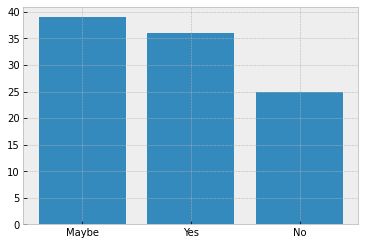

In [152]:
draw_plt(11)

In [153]:
get_summary(11)

Maybe    0.39
Yes      0.36
No       0.25
Name: 11, dtype: float64

In [154]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[11]))
chi2_stat, p_value

(0.662145199960326, 0.7181530292522418)

In [155]:
#yes intervals
lower, upper = proportion_confint(count=36, nobs=100, alpha=0.05)
lower, upper

(0.26592172874207737, 0.4540782712579226)

In [156]:
#No intervals
lower, upper = proportion_confint(count=25, nobs=100, alpha=0.05)
lower, upper

(0.1651310699442871, 0.3348689300557129)

In [157]:
#maybe intervals
lower, upper = proportion_confint(count=39, nobs=100, alpha=0.05)
lower, upper

(0.29440276921149167, 0.48559723078850836)

.--------------------------------------------------------------------------------------------------------.

#### question8)  Does information security in logistics face many internal risks during the supply process at Saudi Post?


In [158]:
#values counts
df[12].value_counts()

Maybe    41
Yes      38
No       21
Name: 12, dtype: int64

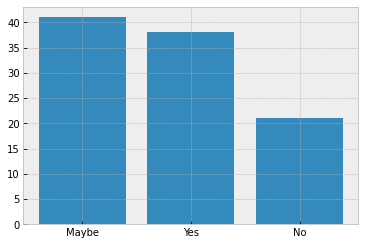

In [159]:
draw_plt(12)

In [160]:
get_summary(12)

Maybe    0.41
Yes      0.38
No       0.21
Name: 12, dtype: float64

In [161]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[12]))
chi2_stat, p_value

(8.511359797907792, 0.014183444157751291)

In [162]:
pd.crosstab(df[2],df[12])

12,Maybe,No,Yes
2,,,
F,28,9,14
M,13,12,24


In [163]:
b_corr = .05 / 3
b_corr

0.016666666666666666

In [164]:
#test one Yes 
prop_diff, p_value = proportions_ztest([14, 24 ], [nF, nM])
prop_diff, p_value

(-2.146055544767084, 0.03186854745169324)

In [165]:
#test two No 
prop_diff, p_value = proportions_ztest([9, 12 ], [nF, nM])
prop_diff, p_value

(-0.789722898307524, 0.42968961552260276)

In [166]:
#test three maYbe 
prop_diff, p_value = proportions_ztest([27, 13 ], [nF, nM])
prop_diff, p_value

(2.784797483705194, 0.0053561164095764415)

In [167]:
p_value < b_corr

True

- there are a differnece in probotion between male and female in anwer maybe 
- female propotion who said maybe is heigher than male probotion who said maybe

In [168]:
df[12].value_counts()

Maybe    41
Yes      38
No       21
Name: 12, dtype: int64

In [169]:
#yes intervals
lower, upper = proportion_confint(count=38, nobs=100, alpha=0.05)
lower, upper

(0.28486600512143223, 0.4751339948785678)

In [170]:
#No intervals
lower, upper = proportion_confint(count=21, nobs=100, alpha=0.05)
lower, upper

(0.1301690524700379, 0.2898309475299621)

In [171]:
#Maybe intervals
lower, upper = proportion_confint(count=41, nobs=100, alpha=0.05)
lower, upper

(0.3136024435617837, 0.5063975564382163)

In [172]:
df[F_filter][12].value_counts()

Maybe    28
Yes      14
No        9
Name: 12, dtype: int64

In [173]:
lower, upper = proportion_confint(count=27, nobs=50, alpha=0.05)
lower, upper

(0.40185381865137054, 0.6781461813486296)

In [174]:
df[M_filter][12].value_counts()

Yes      24
Maybe    13
No       12
Name: 12, dtype: int64

In [175]:
lower, upper = proportion_confint(count=13, nobs=50, alpha=0.05)
lower, upper

(0.13841902475292034, 0.3815809752470797)

.--------------------------------------------------------------------------------------------------------.

#### question9)  Does information security in logistics face many external risks during the supply process at Saudi Post?


In [176]:
#values counts
df[13].value_counts()

Yes      44
Maybe    42
No       14
Name: 13, dtype: int64

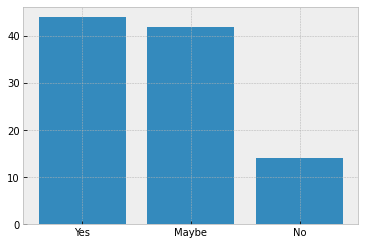

In [177]:
draw_plt(13)

In [178]:
get_summary(13)

Yes      0.44
Maybe    0.42
No       0.14
Name: 13, dtype: float64

In [179]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[13]))
chi2_stat, p_value

(5.1308835222400635, 0.07688520904248389)

In [180]:
df[13].value_counts()

Yes      44
Maybe    42
No       14
Name: 13, dtype: int64

In [181]:
#yes intervals
lower, upper = proportion_confint(count=44, nobs=99, alpha=0.05)
lower, upper

(0.3465624111992731, 0.5423264776896157)

In [182]:
#No intervals
lower, upper = proportion_confint(count=14, nobs=99, alpha=0.05)
lower, upper

(0.07277548403426107, 0.21005279879402175)

In [183]:
#maybe intervals
lower, upper = proportion_confint(count=41, nobs=99, alpha=0.05)
lower, upper

(0.3171124881404219, 0.5111703401424064)

.--------------------------------------------------------------------------------------------------------.

#### question10)  Does the continuity of providing logistical services on the supply chain face electronic information security risks?


In [184]:
#values counts
df[14].value_counts()

Yes      43
Maybe    41
No       16
Name: 14, dtype: int64

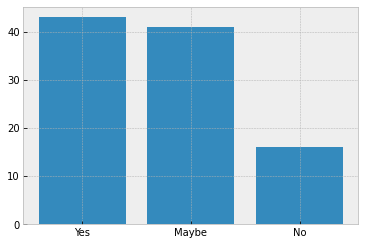

In [185]:
draw_plt(14)

In [186]:
get_summary(14)

Yes      0.43
Maybe    0.41
No       0.16
Name: 14, dtype: float64

In [187]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[14]))
chi2_stat, p_value

(2.7103751313344393, 0.257898916932557)

In [188]:
pd.crosstab(df[2],df[14])

14,Maybe,No,Yes
2,,,
F,23,10,18
M,18,6,25


In [189]:
#test one yes
prop_diff, p_value = proportions_ztest([18, 25 ], [nF, nM])
prop_diff, p_value

(-1.507488932930294, 0.1316853784790746)

In [190]:
#test two no
prop_diff, p_value = proportions_ztest([10, 6 ], [nF, nM])
prop_diff, p_value

(1.0480671732320357, 0.29460765925600374)

In [191]:
#test three maYbe
prop_diff, p_value = proportions_ztest([22, 18 ], [nF, nM])
prop_diff, p_value

(0.7365437624064255, 0.46139984520886135)

In [192]:
df[14].value_counts()

Yes      43
Maybe    41
No       16
Name: 14, dtype: int64

In [193]:
#yes intervals
lower, upper = proportion_confint(count=43, nobs=99, alpha=0.05)
lower, upper

(0.33670438541989284, 0.531982483266976)

In [194]:
#No intervals
lower, upper = proportion_confint(count=16, nobs=99, alpha=0.05)
lower, upper

(0.08910675740997552, 0.23412556582234773)

In [195]:
#may be intervals
lower, upper = proportion_confint(count=40, nobs=99, alpha=0.05)
lower, upper

(0.3073794002972533, 0.5007014077835548)

.--------------------------------------------------------------------------------------------------------.

#### question11) Are the risks faced by information security in the logistics industry frequent and not developed?


In [196]:
#values counts
df[15].value_counts()

Maybe    45
Yes      28
No       27
Name: 15, dtype: int64

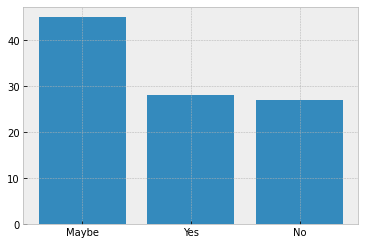

In [197]:
draw_plt(15)

In [198]:
get_summary(15)

Maybe    0.45
Yes      0.28
No       0.27
Name: 15, dtype: float64

In [199]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[15]))
chi2_stat, p_value

(2.372589247339147, 0.3053506093703263)

In [200]:
pd.crosstab(df[2],df[15])

15,Maybe,No,Yes
2,,,
F,26,14,11
M,19,13,17


In [201]:
#test one yes 
prop_diff, p_value = proportions_ztest([11, 17], [nF, nM])
prop_diff, p_value

(-1.4021250685437692, 0.16087790237203614)

In [202]:
#test two no
prop_diff, p_value = proportions_ztest([14, 13 ], [nF, nM])
prop_diff, p_value

(0.16413036132965808, 0.8696285210234677)

In [203]:
#test three maYbe 
prop_diff, p_value = proportions_ztest([15, 19 ], [nF, nM])
prop_diff, p_value

(-0.9193415278168808, 0.357916962974105)

In [204]:
df[15].value_counts()

Maybe    45
Yes      28
No       27
Name: 15, dtype: int64

In [205]:
#yes intervals
lower, upper = proportion_confint(count=28, nobs=100, alpha=0.05)
lower, upper

(0.19199783535321785, 0.3680021646467822)

In [206]:
#No intervals
lower, upper = proportion_confint(count=27, nobs=100, alpha=0.05)
lower, upper

(0.1829855452491477, 0.35701445475085236)

In [207]:
#Maybe intervals
lower, upper = proportion_confint(count=45, nobs=100, alpha=0.05)
lower, upper

(0.3524930229100606, 0.5475069770899395)

.--------------------------------------------------------------------------------------------------------.

#### question12) Have technical developments highlighted the informational risks faced by information security in the logistics services industry at Saudi Post?


In [208]:
#values counts
df[16].value_counts()

Yes      47
Maybe    44
No        9
Name: 16, dtype: int64

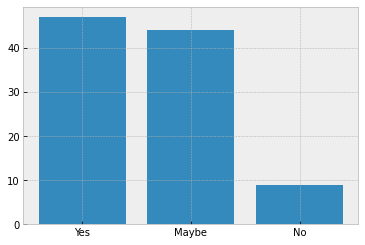

In [209]:
draw_plt(16)

In [210]:
get_summary(16)

Yes      0.47
Maybe    0.44
No       0.09
Name: 16, dtype: float64

In [211]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[16]))
chi2_stat, p_value

(0.18337014582321187, 0.912392441399765)

In [212]:
df[16].value_counts()

Yes      47
Maybe    44
No        9
Name: 16, dtype: int64

In [213]:
#yes intervals
lower, upper = proportion_confint(count=47, nobs=99, alpha=0.05)
lower, upper

(0.37638127350315, 0.5731136759917995)

In [214]:
#No intervals
lower, upper = proportion_confint(count=9, nobs=99, alpha=0.05)
lower, upper

(0.03428023225673732, 0.1475379495614445)

In [215]:
#maybe intervals
lower, upper = proportion_confint(count=43, nobs=99, alpha=0.05)
lower, upper

(0.33670438541989284, 0.531982483266976)

.--------------------------------------------------------------------------------------------------------.

#### question13)  Is the security of the most vulnerable information in the logistics services industry in Saudi Post?


In [216]:
#values counts
df[17].value_counts()

Yes      44
Maybe    42
No       14
Name: 17, dtype: int64

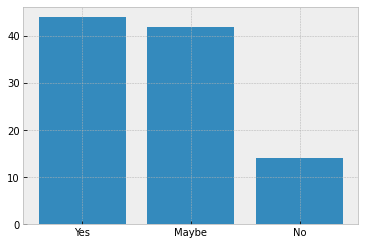

In [217]:
draw_plt(17)

In [218]:
get_summary(17)

Yes      0.44
Maybe    0.42
No       0.14
Name: 17, dtype: float64

In [219]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[17]))
chi2_stat, p_value

(1.960784313725489, 0.3751639468835337)

In [220]:
pd.crosstab(df[2],df[17])

17,Maybe,No,Yes
2,,,
F,24,5,22
M,18,9,22


In [221]:
#test one yes
prop_diff, p_value = proportions_ztest([22, 22], [nF, nM])
prop_diff, p_value

(-0.08989790127172724, 0.9283683489432983)

In [222]:
#test two no
prop_diff, p_value = proportions_ztest([5, 9], [nF, nM])
prop_diff, p_value

(-1.1945791640490988, 0.2322514939464455)

In [223]:
#test three maybe
prop_diff, p_value = proportions_ztest([23, 18], [nF, nM])
prop_diff, p_value

(0.9357384757029242, 0.349407855408142)

In [224]:
df[17].value_counts()

Yes      44
Maybe    42
No       14
Name: 17, dtype: int64

In [225]:
#yes intervals
lower, upper = proportion_confint(count=44, nobs=99, alpha=0.05)
lower, upper

(0.3465624111992731, 0.5423264776896157)

In [226]:
#No intervals
lower, upper = proportion_confint(count=14, nobs=99, alpha=0.05)
lower, upper

(0.07277548403426107, 0.21005279879402175)

In [227]:
#Maybe intervals
lower, upper = proportion_confint(count=41, nobs=99, alpha=0.05)
lower, upper

(0.3171124881404219, 0.5111703401424064)

.--------------------------------------------------------------------------------------------------------.

#### question14)  Are there opportunities for further development in the logistics services currently provided by Saudi Post?


In [228]:
#values counts
df[18].value_counts()

Yes      56
Maybe    36
No        8
Name: 18, dtype: int64

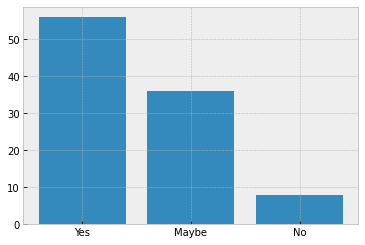

In [229]:
draw_plt(18)

In [230]:
get_summary(18)

Yes      0.56
Maybe    0.36
No       0.08
Name: 18, dtype: float64

In [231]:
chi2_stat, p_value, dof, expected_values  = stats.chi2_contingency(pd.crosstab(df[2],df[18]))
chi2_stat, p_value

(0.9048063669912411, 0.6360976539414245)

In [232]:
#yes intervals
lower, upper = proportion_confint(count=56, nobs=99, alpha=0.05)
lower, upper

(0.4680175167330241, 0.6632956145801072)

In [233]:
#no intervals
lower, upper = proportion_confint(count=8, nobs=99, alpha=0.05)
lower, upper

(0.027122088011245736, 0.1344940736049159)

In [234]:
#maybe intervals
lower, upper = proportion_confint(count=35, nobs=99, alpha=0.05)
lower, upper

(0.2593638925215063, 0.44770681454920075)

.--------------------------------------------------------------------------------------------------------.

# conclusion:


   ###### 1- In the sample, some differences were observed between males and females in the answers to the questions posed, but The differences in the sample were not sufficient to reach results and inference about the population under study, but it is possible Draw conclusions about these differences with a larger sample size.
   ###### 2-Females tended to answer “maybe” more than males, and this may be explained by that the propotion of males with higher  experience is bigger than females.
   ###### 3- there are Differences appeared in the sample between male answers and female answers, but there was not enough evidence to infer that there is Real differences in society.